## FOOD DELIVERY COST AND PROFITABILITY ANALYSIS USING PYTHON

Let´s get started by importing the necessary Python libraries and the dataset.

In [46]:
import pandas as pd

food_orders = pd.read_csv("/teamspace/studios/this_studio/Project I/food_orders_new_delhi.csv")
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


The dataset contains 1,000 entries and 12 columns, with no missing values in any of the columns. Now, we need to perform some `data cleaning` and preparation. Below are the necessary cleaning steps we need to take:

* Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.
* Convert “Discounts and Offers” to a consistent numeric value (if applicable) or calculate the discount amounts.
* Ensure all monetary values are in a suitable format for calculations.

In [5]:

# convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

# first, let's create a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if pd.isna(discount_str):
        return 0.0
    elif 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])/100
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])/100
    else:
        # No discount
        return 0.0

# apply the function to create a new 'Discount Percentage' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

# for percentage discounts, calculate the discount amount based on the order value
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] ), axis=1)

food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0.05,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0.10,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0.15,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.00,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0.50,996.00


The data is now ready with the following adjustments:

* Order Date and Time and Delivery Date and Time columns have been converted to datetime format.
* A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.
* Discount Percentage has been added to represent the discount rate or fixed amount discount directly.

## Cost and Profitability Analysis
For the cost analysis, we’ll consider the following costs associated with each order:

* Delivery Fee: The fee charged for delivering the order.
* Payment Processing Fee: The fee for processing the payment.
* Discount Amount: The discount provided on the order.

We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

Let’s proceed with the cost and profitability analysis:

In [8]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)


{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.84999999998, 'Total Profit': -105719.85}


The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

To better understand the distribution of costs, revenue, and profit, let’s plot:

A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
A bar chart to compare total revenue, total costs, and total profit
Let’s plot the histogram first:

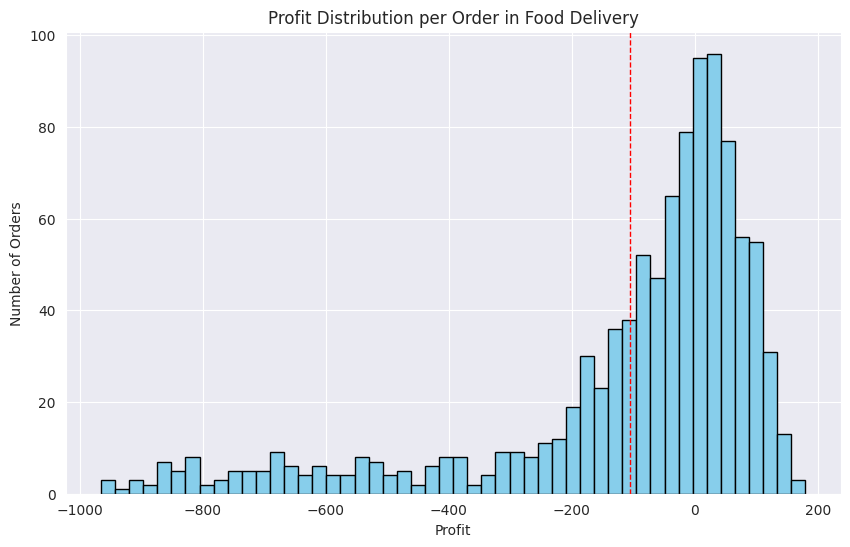

Non profitable orders percentage: 0.585
Profitable orders percentage: 0.41500000000000004
Mean profit per order -105.71985000000001


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

#mean profit per order (red line)
mean_profit = food_orders['Profit'].mean()
#percentage of non-profitable orders
pct_non_profitable = len(food_orders.loc[food_orders["Profit"] <= 0])/len(food_orders)
pct_profitable = 1 - pct_non_profitable
print("Non profitable orders percentage:", pct_non_profitable)
print("Profitable orders percentage:",pct_profitable)
print("Mean profit per order", mean_profit)

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

Now, let’s have a look at the proportion of total costs:

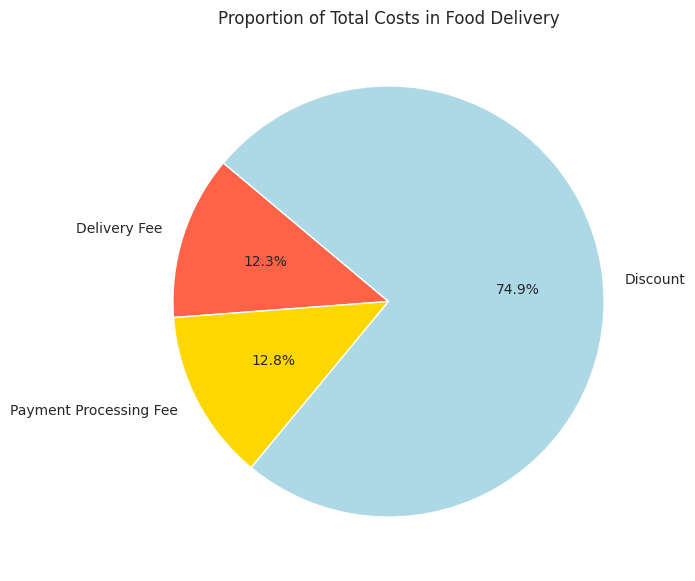

In [10]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=["Delivery Fee", "Payment Processing Fee", "Discount"], autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

## Added Value - Impact on profitability of the different types of discounts.



[110018.0, 9747.650000000001, 24552.5, 29939.699999999997]


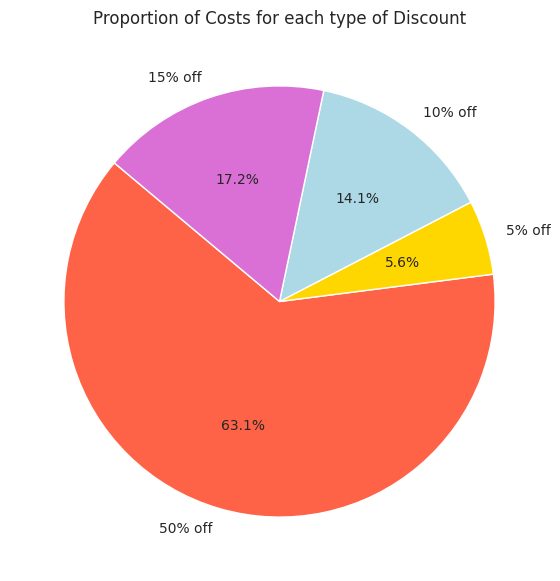

In [11]:
# pie chart for the proportion of discount costs
costs_breakdown = [
    food_orders.loc[food_orders["Discount Percentage"] == 0.5,"Discount Amount"].sum(),
    food_orders.loc[food_orders["Discount Percentage"] == 0.05, "Discount Amount"].sum(),
    food_orders.loc[food_orders["Discount Percentage"] == 0.10, "Discount Amount"].sum(),
    food_orders.loc[food_orders["Discount Percentage"] == 0.15, "Discount Amount"].sum()]
print(costs_breakdown)

plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=["50% off", "5% off", "10% off", "15% off"], autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue', "orchid"])
plt.title('Proportion of Costs for each type of Discount')
plt.show()

Approximately the 50% discount accounts for 63.1% * 74.9% = 47.3% off total costs. Let's see what percentage of orders have this discount

In [20]:
#print how many orders have discount and which type

discounts = [0.05, 0.1, 0.15, 0.5]

print(f"{len(food_orders.loc[food_orders['Discount Percentage'] == 0])/len(food_orders)*100}% of orders don't have a discount")

for discount in discounts:
    print(f"{len(food_orders.loc[food_orders['Discount Percentage'] == discount])/len(food_orders)*100}% of orders have a {discount*100}% discount")



18.5% of orders don't have a discount
18.3% of orders have a 5.0% discount
23.3% of orders have a 10.0% discount
19.8% of orders have a 15.0% discount
20.1% of orders have a 50.0% discount


The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

Now, let’s compare total revenue, total costs, and total profit (net loss in our case):

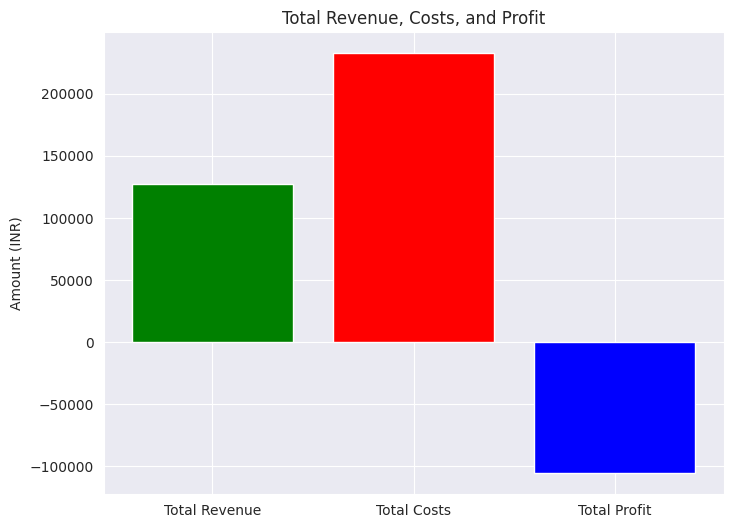

<Figure size 640x480 with 0 Axes>

In [10]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]


plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')

plt.show()
plt.savefig("Total Revenue, Costs, and Profit")

## A New Strategy for Profits
From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

* A new average commission percentage based on profitable orders.
* A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:

* The average commission percentage for profitable orders.
* The average discount percentage for profitable orders.

In [11]:
# filter the dataset for profitable orders
profitable_orders = food_orders.loc[food_orders['Profit'] > 0,:]
# calculate the average commission percentage for profitable orders
profitable_orders.loc[:,'Commission Percentage'] = (profitable_orders.loc[:,'Commission Fee'] / profitable_orders.loc[:,'Order Value']) * 100
# # calculate the average discount percentage for profitable orders
profitable_orders.loc[:,'Effective Discount Percentage'] = (profitable_orders.loc[:,'Discount Amount'] / profitable_orders.loc[:,'Order Value']) * 100

# # calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()   
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


/tmp/ipykernel_2439/140620886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders.loc[:,'Commission Percentage'] = (profitable_orders.loc[:,'Commission Fee'] / profitable_orders.loc[:,'Order Value']) * 100
/tmp/ipykernel_2439/140620886.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders.loc[:,'Effective Discount Percentage'] = (profitable_orders.loc[:,'Discount Amount'] / profitable_orders.loc[:,'Order Value']) * 100


Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:

The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.

Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

* Calculate the profitability per order using the actual discounts and commissions already present in the dataset.
* Simulate profitability per order using the recommended discounts (6%) and commissions (30%) to see the potential impact on profitability.

This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders. Here’s how to visualize this comparison:

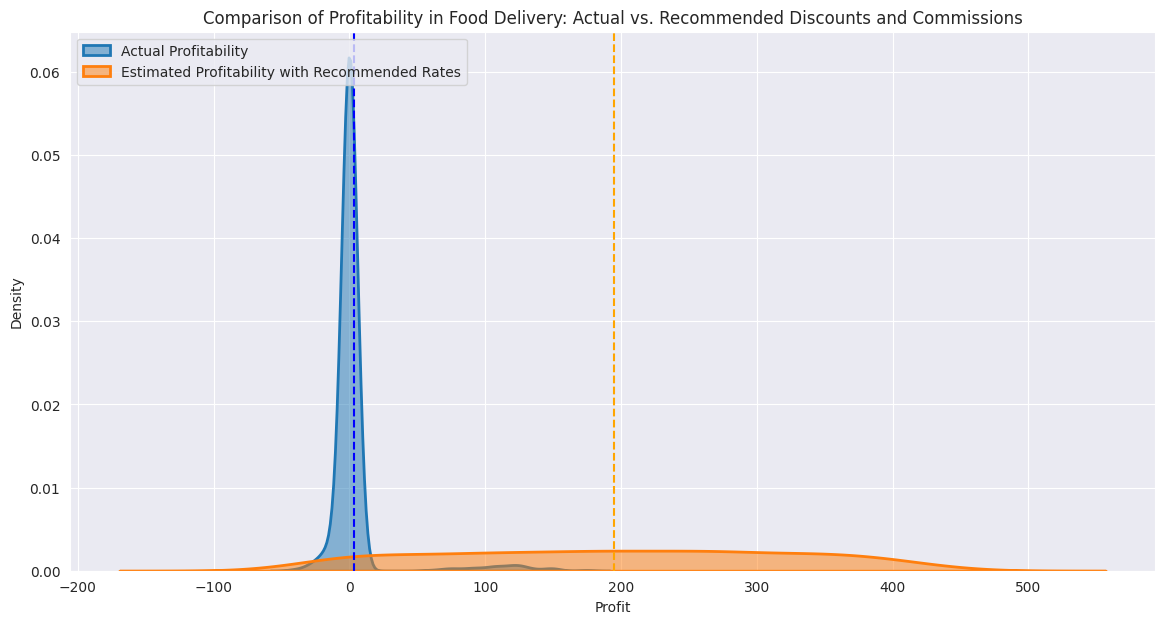

{'Total Orders': 1000, 'Total Revenue': 316190.69999999995, 'Total Costs': 121690.14, 'Total Profit': 194500.56}
Simulated Non profitable orders percentage: 0.073
Simulated Profitable orders percentage: 0.927
Simulated Mean profit per order 194.50056


In [45]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

# visualizing the comparison

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)
plt.axvline(food_orders['Profit'].mean(), color='blue', linestyle='dashed', linewidth=1.5)
plt.axvline(food_orders['Simulated Profit'].mean(), color='orange', linestyle='dashed', linewidth=1.5)


plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

total_orders = food_orders.shape[0]
simulated_total_revenue = food_orders['Simulated Commission Fee'].sum()
simulated_total_costs = food_orders['Simulated Total Costs'].sum()
simulated_total_profit = food_orders['Simulated Profit'].sum()

overall_simulated_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": simulated_total_revenue,
    "Total Costs": simulated_total_costs,
    "Total Profit": simulated_total_profit
}

print(overall_simulated_metrics)

#mean simulated profit per order (red line)
simulated_mean_profit = food_orders['Simulated Profit'].mean()
#simulated percentage of non-profitable orders
simulated_pct_non_profitable = len(food_orders.loc[food_orders["Simulated Profit"] <= 0])/len(food_orders)
simulated_pct_profitable = 1 - simulated_pct_non_profitable
print("Simulated Non profitable orders percentage:", simulated_pct_non_profitable)
print("Simulated Profitable orders percentage:",simulated_pct_profitable)
print("Simulated Mean profit per order", simulated_mean_profit)


## Added Value - New Discount Rates to avoid Unprofitability

We can calculte a maximum discount rate to avoid being unprofitable in each order. Sometimes this unprofitability cannot be resolved with a 0 discount rate because a big Delivery and Payment Fee, but we will leave that for now.

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 123597.0, 'Total Profit': 3393.0}
{'Current Mean Discount': 0.163, 'Proposed Mean Discount': 0.082, 'Max proposed Discount': 0.5, 'Min proposed Discount': 0.0}


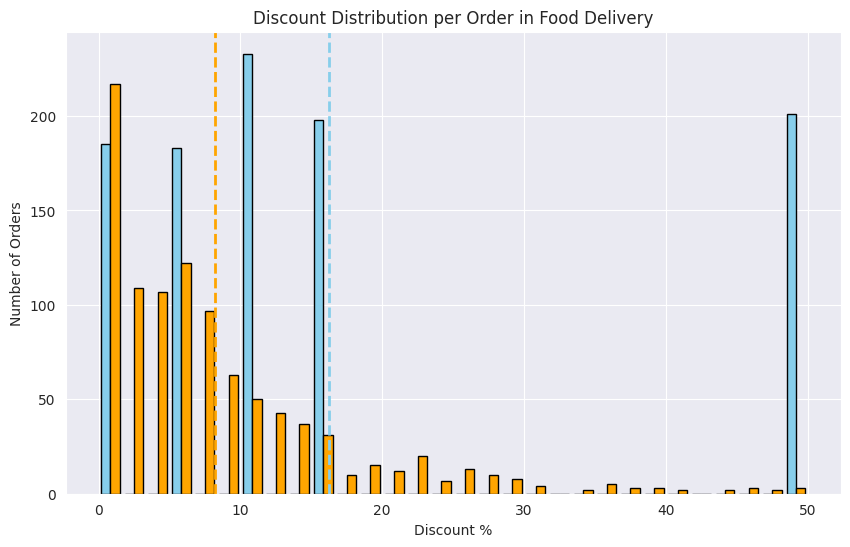

In [44]:
#recalculte possible new discounts with comission fees and costs so that we don't have a negative profit
def proposed_discount(x):
    net_margin = x["Commission Fee"] - x["Payment Processing Fee"] - x["Delivery Fee"]

    if net_margin/x["Order Value"] < 0:
        return 0
    elif net_margin/x["Order Value"] > 0.5:
        return 0.5
    else:
        return net_margin


food_orders["Proposed Discount Amount"] = food_orders.apply(proposed_discount, axis=1)

food_orders["Proposed Discount Percentage"] = food_orders["Proposed Discount Amount"]/food_orders["Order Value"]

# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Proposed Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}
percentage_metrics = {
    "Current Mean Discount": food_orders["Discount Percentage"].mean().round(3),
    "Proposed Mean Discount": food_orders["Proposed Discount Percentage"].mean().round(3),
    "Max proposed Discount": food_orders["Proposed Discount Percentage"].max(),
    "Min proposed Discount": food_orders["Proposed Discount Percentage"].min()
}
print(overall_metrics)
print(percentage_metrics)

sns.set_style("darkgrid")
# histogram of discounts per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders[['Discount Percentage', "Proposed Discount Percentage"]]*100,bins=30, color=['skyblue', "orange"], edgecolor='black')
plt.title('Discount Distribution per Order in Food Delivery')
plt.xlabel('Discount %')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Discount Percentage'].mean()*100, color='skyblue', linestyle='dashed', linewidth=2)
plt.axvline(food_orders['Proposed Discount Percentage'].mean()*100, color='orange', linestyle='dashed', linewidth=2)

plt.show()
